In [34]:
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)

In [35]:
def plot_data(data_set, model=None, n=1, color=False):
    X = data_set.x
    Y = data_set.y
    plt.plot(X[Y == 0, 0].numpy(), Y[Y==0].numpy(), 'bo', label='y=0')
    plt.plot(X[Y == 1, 0].numpy(), 0 * Y[Y==1].numpy(), 'ro', label='y=1')
    plt.plot(X[Y == 2, 0].numpy(), 0 * Y[Y==2].numpy(), 'go', label='y=2')
    plt.ylim((-0.1, 3))
    plt.legend()
    if model != None:
        w = list(model.parameters())[0][0].detach()
        b = list(model.parameters())[1][0].detach()
        y_label = ['yhat=0', 'yhat=1', 'yhat=2']
        y_color = ['b', 'r', 'g']
        Y = []
        for w, b, y_l, y_c in zip(model.state_dict()['0.weight'], model.state_dict()['0.bias'], y_label, y_color):
            Y.append((w * X + b).numpy())
            plt.plot(X.numpy(), (w * X + b).numpy(), y_c, label=y_l)
        if color:
            x = X.numpy()
            x = x.reshape(-1)
            top = np.ones(x.shape)
            y0 = Y[0].reshape(-1)
            y1 = Y[1].reshape(-1)
            y2 = Y[2].reshape(-1)
            plt.fill_between(x, y0, where = y1 > y1, interpolate = True, color = 'blue')
            plt.fill_between(x, y0, where = y1 > y2, interpolate = True, color = 'blue')
            plt.fill_between(x, y1, where = y1 > y0, interpolate = True, color = 'red')
            plt.fill_between(x, y1, where = ((y1 > y2) * (y1 > y0)),interpolate = True, color = 'red')
            plt.fill_between(x, y2, where = (y2 > y0) * (y0 > 0),interpolate = True, color = 'green')
            plt.fill_between(x, y2, where = (y2 > y1), interpolate = True, color = 'green')
    plt.legend()
    plt.plot()

In [36]:
torch.manual_seed(0)

In [37]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-2, 2, 0.1).view(-1, 1)
        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x > -1.0)[:, 0] * (self.x < 1.0)[:, 0]] = 1
        self.y[(self.x >= 1.0)[:, 0]] = 2
        self.y = self.y.type(torch.LongTensor)
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

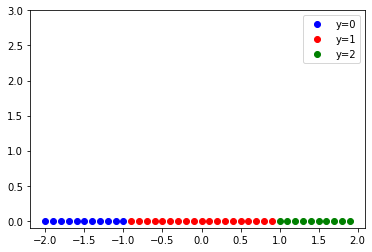

In [38]:
ds = Data()
plot_data(ds)
trainloader = DataLoader(ds, batch_size=5)

In [48]:
model = nn.Sequential(nn.Linear(1, 3))
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4080],
                      [-0.8723],
                      [-0.9324]])),
             ('0.bias', tensor([-0.9858,  0.4305,  0.4945]))])

In [49]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
trainloader = DataLoader(dataset=ds, batch_size=5)

In [50]:
LOSS = []

def train_model(epochs):
    for epoch in range(epochs):
        for x, y in trainloader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss)
            loss.backward()
            optimizer.step()

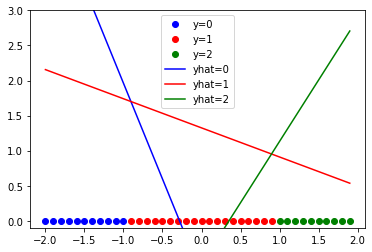

In [51]:
train_model(300)
plot_data(ds, model)

In [52]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-2.7301],
                      [-0.4152],
                      [ 1.7487]])),
             ('0.bias', tensor([-0.7687,  1.3248, -0.6169]))])

In [54]:
z = model(ds.x)
_, y_hat = z.max(1)
print(y_hat)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])


In [56]:
correct = (y_hat == ds.y).sum().item()
print(correct/ds.len)

0.975


In [57]:
Softmax_fn = nn.Softmax(dim=-1)

In [58]:
prob = Softmax_fn(z)

In [61]:
for i in range(3):
    print("probability of class {} is given by  {}".format(i, prob[0,i]) )

probability of class 0 is given by  0.9265231490135193
probability of class 1 is given by  0.07333806157112122
probability of class 2 is given by  0.00013882439816370606
